In [5]:
using Flux
using Plots
using Distributions

In [85]:
M=40
rng=Uniform(-1,1)
x_train=rand(rng, 40)
eps=0.1*rand(rng,M)
y_train=sin.(2*pi*x_train).+eps
xgrid=range(-1,1,100)
ygrid=sin.(2*pi*xgrid)

100-element Vector{Float64}:
  2.4492935982947064e-16
  0.12659245357374993
  0.2511479871810794
  0.3716624556603281
  0.4861967361004688
  0.5929079290546408
  0.690079011482112
  0.7761464642917572
  0.8497254299495144
  0.9096319953545186
  0.9549022414440739
  0.9848077530122081
  0.998867339183008
  ⋮
 -0.9848077530122081
 -0.9549022414440739
 -0.9096319953545186
 -0.8497254299495144
 -0.7761464642917572
 -0.690079011482112
 -0.5929079290546408
 -0.4861967361004688
 -0.3716624556603281
 -0.2511479871810794
 -0.12659245357374993
 -2.4492935982947064e-16

In [96]:
n_inputs=M
n_hidden=50
n_output=M
model=Chain(
            Dense(n_inputs,n_hidden,tanh),
            Dense(n_hidden,n_hidden,tanh),
            Dense(n_hidden,n_output)
)
loss(model,x,y)=Flux.mse(model(x),y)
opt=Descent(0.005)
n_epochs=1000
for epoch in 1:n_epochs
    Flux.train!(loss,Flux.params(model),[(x_train,y_train)],opt)
end

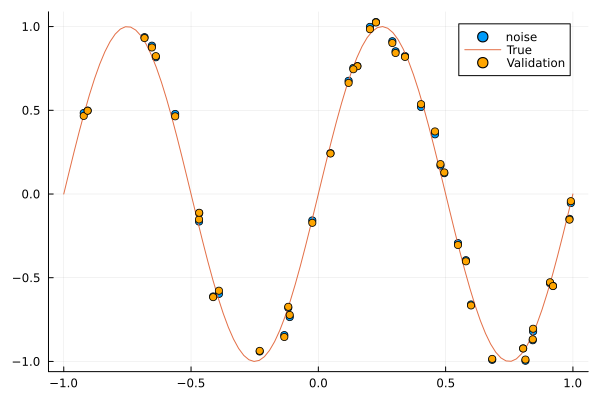

In [97]:
scatter(x_train,y_train,label="noise")
plot!(xgrid,ygrid,label="True")

scatter!(x_train,model(x_train),color="orange",label="Validation")